In [1]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.stats.stattools import jarque_bera  
from statsmodels.iolib.table import SimpleTable
import numpy as np
import statsmodels.api as st
from sklearn.metrics import r2_score
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error


In [2]:
start = '2016'
end = datetime(2021, 10, 1)

In [3]:
moex = web.DataReader('GAZP', 'moex', start=start, end=end)

In [4]:
moex.head()

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,...,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2016-01-04,134.91,1.677416e+09,NaN,NaN,TQBR,NaN,NaN,NaN,134.91,NaN,...,NaN,NaN,NaN,NaN,1.677416e+09,12409380.0,135.17,NaN,NaN,NaN
2016-01-05,136.45,1.942157e+09,NaN,NaN,TQBR,NaN,NaN,NaN,136.45,NaN,...,NaN,NaN,NaN,NaN,1.942157e+09,14285210.0,135.96,NaN,NaN,NaN
2016-01-06,135.94,1.413184e+09,NaN,NaN,TQBR,NaN,NaN,NaN,135.94,NaN,...,NaN,NaN,NaN,NaN,1.413184e+09,10393910.0,135.96,NaN,NaN,NaN
2016-01-11,131.38,4.489337e+09,NaN,NaN,TQBR,NaN,NaN,NaN,131.38,NaN,...,NaN,NaN,NaN,NaN,4.489337e+09,34008830.0,132.00,NaN,NaN,NaN
2016-01-12,133.54,5.292858e+09,NaN,NaN,TQBR,NaN,NaN,NaN,133.54,NaN,...,NaN,NaN,NaN,NaN,5.292858e+09,39697670.0,133.33,NaN,NaN,NaN


In [5]:
#Данные эпл с яху
#ticker = 'AAPL'
#apple_data = web.get_data_yahoo(ticker, start=start, end=end)
#need_columns = list(apple_data.columns)
#need_columns = [x.upper() for x in need_columns]
#need_columns.pop()

In [6]:
#gazprom_data = web.get_data_yahoo(ticker, start=start, end=end)

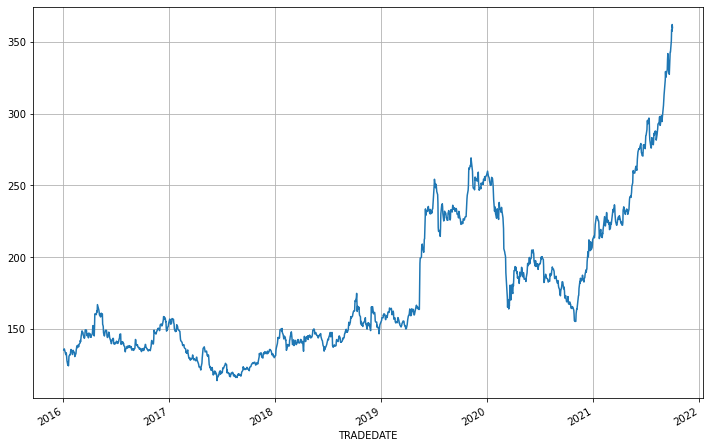

In [7]:
moex['WAPRICE'].plot(grid=True, figsize=(12,8))
# Show the plot
plt.show()

In [8]:
wap_gasp = moex['WAPRICE']

In [9]:
type(wap_gasp)

pandas.core.series.Series

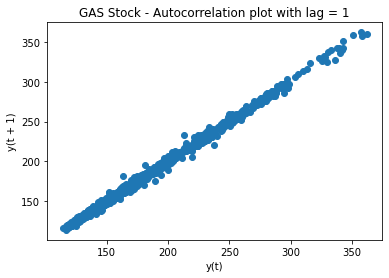

In [10]:
plt.figure()
lag_plot(wap_gasp, lag=1)
plt.title('GAS Stock - Autocorrelation plot with lag = 1')
plt.show()

In [11]:
jb_test = list(list(jarque_bera(wap_gasp)))

In [12]:
row =  ["JB", "p-value", "skew", "kurtosis"]
#a = np.vstack([jb_test])
itog = SimpleTable([jb_test], row)
print(itog)

        JB               p-value                skew             kurtosis    
-----------------------------------------------------------------------------
287.0234039147966 4.7169334762617476e-63 1.0660731241872439 3.445130171974497
-----------------------------------------------------------------------------


In [13]:
d_fuller_test = st.tsa.adfuller(wap_gasp)

In [14]:
print(f'adf: {d_fuller_test[0]}')
print(f'p-value: {d_fuller_test[1]}')
print(f'Critical values: {d_fuller_test[4]}')
if (d_fuller_test[0]> d_fuller_test[4]['5%']): 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf: 1.085622777736993
p-value: 0.99509203161034
Critical values: {'1%': -3.434908816804013, '5%': -2.863553406963303, '10%': -2.5678419239852994}
есть единичные корни, ряд не стационарен


<Figure size 864x576 with 0 Axes>

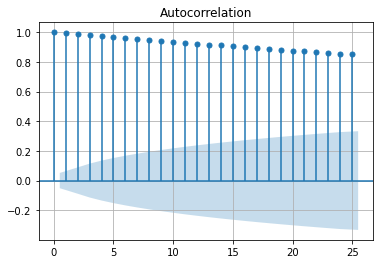

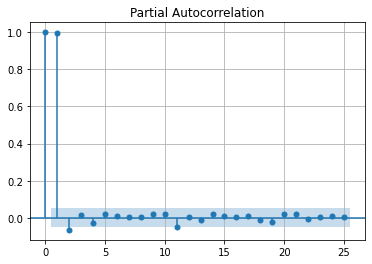

In [15]:
ig = plt.figure(figsize=(12, 8))
fig = st.graphics.tsa.plot_acf(wap_gasp.values.squeeze(), lags=25)
plt.grid()
fig = st.graphics.tsa.plot_pacf(wap_gasp, lags=25)
plt.grid()

In [17]:
wap_gasp_diff = wap_gasp.diff(periods=1).dropna()

In [18]:
d_fuller_test_diff = st.tsa.adfuller(wap_gasp_diff)
print(f'adf: {d_fuller_test_diff[0]}')
print(f'p-value: {d_fuller_test_diff[1]}')
print(f'Critical values: {d_fuller_test_diff[4]}')
if (d_fuller_test_diff[0]> d_fuller_test_diff[4]['5%']): 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf: -9.31080573897621
p-value: 1.0503469215531983e-15
Critical values: {'1%': -3.434908816804013, '5%': -2.863553406963303, '10%': -2.5678419239852994}
единичных корней нет, ряд стационарен


<AxesSubplot:xlabel='TRADEDATE'>

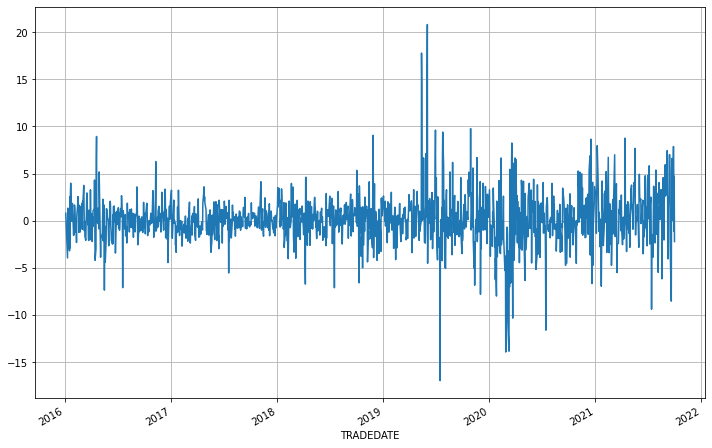

In [19]:
wap_gasp_diff.plot(grid=True, figsize=(12,8))

<Figure size 864x576 with 0 Axes>

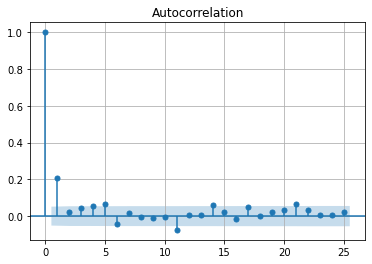

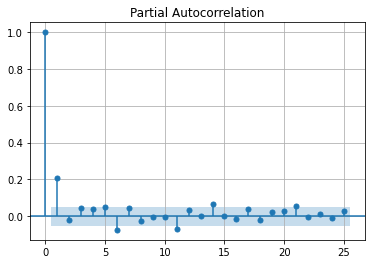

In [23]:
ig = plt.figure(figsize=(12, 8))
fig = st.graphics.tsa.plot_acf(wap_gasp_diff.values.squeeze(), lags=25)
plt.grid()
fig = st.graphics.tsa.plot_pacf(wap_gasp_diff, lags=25)
plt.grid()

In [24]:
train, test = wap_gasp[:-30], wap_gasp[-30:]

In [25]:
print(f'wap: {len(wap_gasp)}')
print(f'train: {len(train)}')
print(f'test: {len(test)}')

wap: 1452
train: 1422
test: 30


In [26]:
print(type(train))
print(type(train.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [27]:
training_data = train.values
test_data = test.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = st.tsa.ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 18.222067383832325


In [28]:
test_set_range = [x for x in range(len(test))]

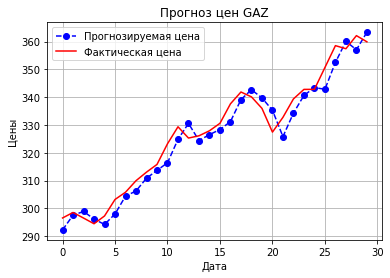

In [29]:
plt.plot(test_set_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Прогнозируемая цена')
plt.plot(test_set_range, test_data, color = 'red', label = 'Фактическая цена')
plt.title('Прогноз цен GAZ') 
plt.xlabel('Дата') 
plt.ylabel('Цены') 

plt.grid()
plt.legend() 
plt.show()

In [30]:
wap_part = wap_gasp[-80:]
wap_part

TRADEDATE
2021-06-14    279.16
2021-06-15    275.64
2021-06-16    272.62
2021-06-17    272.62
2021-06-18    270.91
               ...  
2021-09-27    350.66
2021-09-28    358.52
2021-09-29    357.41
2021-09-30    362.12
2021-10-01    359.90
Name: WAPRICE, Length: 80, dtype: float64

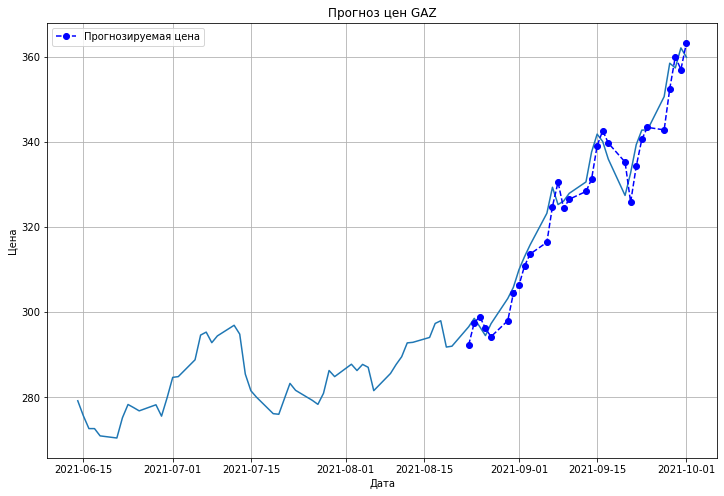

In [38]:
time_predict = wap_part.index[-30:]
plt.figure(figsize=(12, 8))
plt.plot(wap_part.index, wap_part.values)
plt.plot(time_predict, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Прогнозируемая цена')
plt.title('Прогноз цен GAZ') 
plt.xlabel('Дата') 
plt.ylabel('Цена') 
plt.grid()
plt.legend() 
plt.show()

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1450
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3422.773
Method:                       css-mle   S.D. of innovations              2.564
Date:                Thu, 21 Oct 2021   AIC                           6853.545
Time:                        21:49:35   BIC                           6874.663
Sample:                             1   HQIC                          6861.426
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1574      0.083      1.906      0.057      -0.004       0.319
ar.L1.D.y      0.0462      0.145      0.317      0.751      -0.239       0.331
ma.L1.D.y      0.1699      0.144      1.176      0.240      -0.113       0.453
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           21.6666           +0.0000j           21.6666            0.0000
MA.1           -5.8863           +0.0000j            5.8863            0.5000
-----------------------------------------------------------------------------
"""

### Q-тест Льюнг-Бокса
Статистический критерий, предназначенный для нахождения автокорреляции временны́х рядов. Вместо тестирования на случайность каждого отдельного коэффициента, он проверяет на отличие от нуля сразу несколько коэффициентов автокорреляции.
Выдвигаются две конкурирующие гипотезы:

$H_0$: данные являются случайными(то есть представляют собой белый шум).

$H_1$: данные не являются случайными.

In [33]:
q_test = st.tsa.stattools.acf(model_fit.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.000023  0.996201
1    0.023090  0.988521
2    1.923498  0.588436
3    3.590941  0.464186
4   11.353361  0.044807
5   17.997574  0.006238
6   19.912334  0.005762
7   19.947032  0.010538
8   20.252546  0.016416
9   20.478203  0.025041
10  30.700310  0.001229
11  31.685578  0.001547
12  31.767396  0.002600
13  36.461885  0.000889
14  36.984190  0.001272
15  38.444761  0.001307
16  43.066432  0.000470
17  43.387218  0.000705
18  44.384815  0.000835
19  44.733802  0.001199
20  49.728077  0.000398
21  50.570417  0.000491
22  50.572153  0.000775
23  50.616929  0.001181
24  51.417813  0.001420
25  51.457937  0.002097
26  51.466978  0.003067
27  51.786496  0.004059
28  52.113100  0.005295
29  52.392596  0.006907
30  53.337955  0.007568
31  53.498295  0.009970
32  53.504260  0.013439
33  53.709974  0.017080
34  57.578975  0.009468
35  57.940269  0.011664
36  58.578087  0.013408
37  59.650373  0.013958
38  62.802241  0.009202
39  63.584482  0.010236


In [34]:
r2 = r2_score(test_data, model_predictions)
print('R^2: %1.2f' % r2)

R^2: 0.96


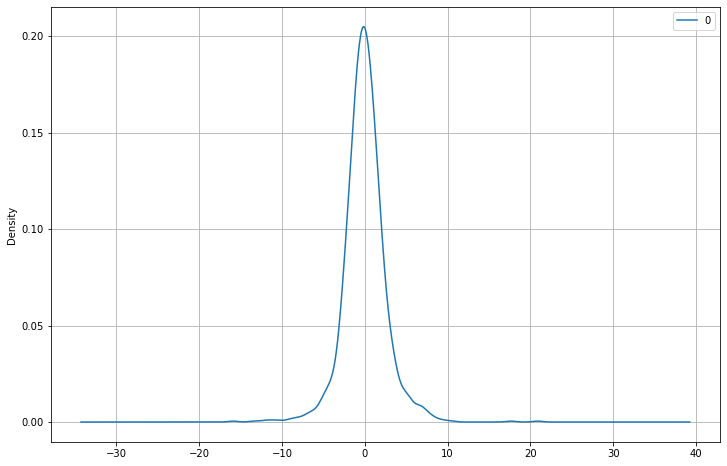

                 0
count  1450.000000
mean     -0.000065
std       2.564912
min     -15.893674
25%      -1.318541
50%      -0.048234
75%       1.238147
max      20.855171


In [37]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde', grid=True, figsize=(12,8))
plt.show()
print(residuals.describe())

### Predict

predict(typ='linear') - дает разности между предыдущими предсказанными значениями

predict(typ='levels') - дает предикт самих значений

<Figure size 864x720 with 0 Axes>

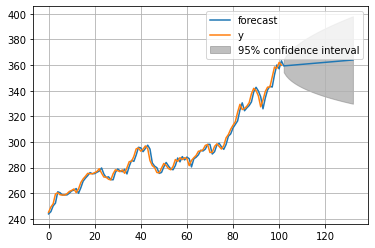

In [139]:
Arima_model = st.tsa.ARIMA(wap_gasp.values, order=(1,1,1))
results = Arima_model.fit()

results.plot_predict(1350, len(wap_gasp)+30)
plt.grid()

In [157]:
len(test)

30

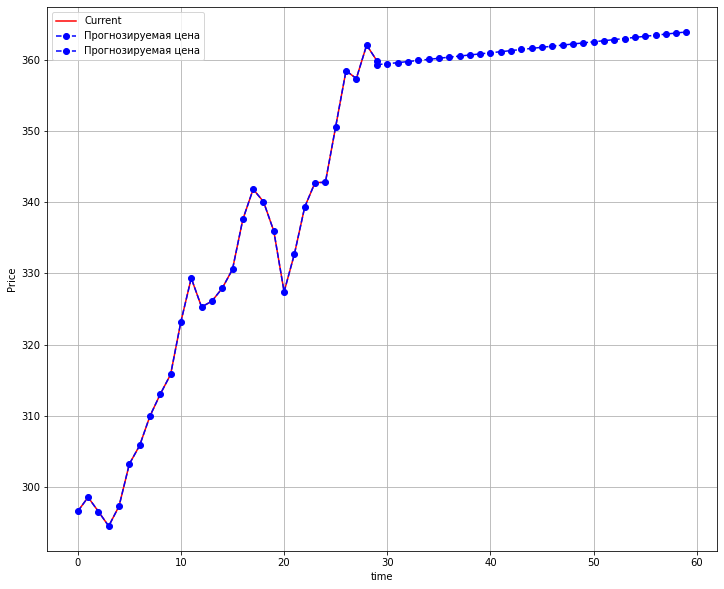

In [173]:
test_set_range = [x for x in range(len(test))]
predict_ser_range = [x+30 for x in range(len(predict))]
plt.figure(figsize=(12,10))
plt.plot(test_set_range, wap_part.values[-30:], color = 'red', label='Current')
plt.plot(test_set_range, test_data, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Прогнозируемая цена')
plt.plot(predict_ser_range, predict, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Прогнозируемая цена')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

In [109]:
results.predict(1, len(wap_gasp)+30)

array([0.15447065, 0.28606209, 0.10014681, ..., 0.15447065, 0.15447065,
       0.15447065])

In [118]:
predict = results.predict(len(wap_gasp), len(wap_gasp)+30, typ='levels')